In [75]:
# For matrix computation
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

# Load data set and display first few observations
url = 'https://raw.githubusercontent.com/CoverGo/health-insurance-risk-model-ann/master/Health-insurance-dataset1.csv'
dataset = pd.read_csv(url)
dataset.head()

,Occupation type,Sex,Age,Motorcycle usage,Alcohol usage length (year),Average daily cigarette consumption,Cigarette usage length (year),BMI (weight/height ratio),Exercicing (years),Claim
0,1,1,67,1,20,4,18,33,4,1
1,1,2,37,1,15,2,8,27,2,0
2,1,2,27,0,5,0,0,19,11,0
3,2,1,40,0,13,2,7,26,3,1
4,1,1,28,0,10,0,0,23,1,0


In [76]:
# Summary statistics (mean, stdev, min, max)
dataset.describe()

,Occupation type,Sex,Age,Motorcycle usage,Alcohol usage length (year),Average daily cigarette consumption,Cigarette usage length (year),BMI (weight/height ratio),Exercicing (years),Claim
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.323529,1.343137,43.607843,0.362745,6.470588,3.598039,7.607843,25.245098,3.901961,0.323529
std,0.470133,0.477101,15.288096,0.483166,7.348073,3.538361,8.936694,6.606981,5.123253,0.470133
min,1.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,1.000000,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000
50%,1.000000,1.000000,41.000000,0.000000,5.000000,3.000000,4.000000,26.000000,2.000000,0.000000
75%,2.000000,2.000000,52.000000,1.000000,10.000000,5.750000,14.250000,30.000000,5.000000,1.000000
max,2.000000,2.000000,80.000000,1.000000,35.000000,15.000000,40.000000,42.000000,23.000000,1.000000


In [77]:
# Define features
X = dataset.iloc[:,0:9]

# Define categorical Historical family record 
y = dataset.iloc[:,9]

# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
print(X_std)

     Occupation type       Sex       Age  Motorcycle usage  \
0          -0.691564 -0.722764  1.537646          1.325427   
1          -0.691564  1.383577 -0.434356          1.325427   
2          -0.691564  1.383577 -1.091690         -0.754474   
3           1.445998 -0.722764 -0.237156         -0.754474   
4          -0.691564 -0.722764 -1.025956         -0.754474   
5          -0.691564  1.383577  0.157245         -0.754474   
6           1.445998 -0.722764  1.800579          1.325427   
7           1.445998 -0.722764 -0.500089         -0.754474   
8          -0.691564 -0.722764  0.814578         -0.754474   
9          -0.691564  1.383577  0.025778         -0.754474   
10          1.445998 -0.722764 -0.500089         -0.754474   
11         -0.691564 -0.722764  0.551645         -0.754474   
12          1.445998  1.383577  0.485911         -0.754474   
13         -0.691564 -0.722764 -1.420357          1.325427   
14         -0.691564 -0.722764 -1.551823         -0.754474   
15      

In [78]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00990099 -0.05900103  0.13347143 -0.0427243  -0.11730959  0.17590523
   0.21881136  0.10916514 -0.0239314 ]
 [-0.05900103  1.00990099 -0.1306081  -0.03019313 -0.28655782 -0.41420633
  -0.35241568  0.05209048  0.0631256 ]
 [ 0.13347143 -0.1306081   1.00990099 -0.10354116  0.4177003   0.1859371
   0.48487926  0.19153048  0.13494769]
 [-0.0427243  -0.03019313 -0.10354116  1.00990099 -0.09409935 -0.04753494
   0.08917746 -0.20067949 -0.05401683]
 [-0.11730959 -0.28655782  0.4177003  -0.09409935  1.00990099  0.18970894
   0.44307143  0.09314195  0.11944466]
 [ 0.17590523 -0.41420633  0.1859371  -0.04753494  0.18970894  1.00990099
   0.75572207  0.13389507 -0.11032708]
 [ 0.21881136 -0.35241568  0.48487926  0.08917746  0.44307143  0.75572207
   1.00990099  0.19115954 -0.1574428 ]
 [ 0.10916514  0.05209048  0.19153048 -0.20067949  0.09314195  0.13389507
   0.19115954  1.00990099 -0.25893143]
 [-0.0239314   0.0631256   0.13494769 -0.05401683  0.11944466 -0.1103270

In [79]:
# Step 2: Obtain eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.16005487 -0.07742781  0.32169598  0.06423147 -0.79212017 -0.02900688
  -0.30991728  0.36614888 -0.0486199 ]
 [-0.3412998  -0.09530862  0.08395749  0.37177562 -0.10404581 -0.46072153
  -0.30264141 -0.56795469 -0.30316749]
 [ 0.37754949 -0.22500349 -0.27687508  0.32683319 -0.13076154 -0.38510456
   0.60695916  0.13842779 -0.26530038]
 [-0.04749711 -0.15019127  0.01035393 -0.61561176  0.01411554 -0.70822811
  -0.02537809  0.08007338  0.29539715]
 [ 0.36453981 -0.21767198 -0.44029768  0.142801    0.30849753 -0.08234816
  -0.66048231  0.24824608 -0.07523644]
 [ 0.47555319 -0.55964504  0.1723062  -0.22697691 -0.06795513  0.25454709
   0.0035122  -0.55154992  0.07620293]
 [ 0.55945337  0.73154811  0.06421719 -0.12937497 -0.0247778  -0.16488935
  -0.08349492 -0.27893708 -0.1356754 ]
 [ 0.18904314  0.01619637  0.41122406  0.52393293  0.22753504 -0.18212272
   0.00651768  0.03838479  0.65873567]
 [-0.07301918  0.12541368 -0.64491493  0.09330166 -0.4384604   0.071197

In [80]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.6233838524696673, 1.3642303858497689, 1.2895869012487988, 1.0479638746433475, 0.9129390780832117, 0.6603984621569752, 0.5666450899662429, 0.4914827636604896, 0.1324785028125982]


Cumulative proportion of variance explained vector: 
[0.28862938 0.43872444 0.5806071  0.69590595 0.79634914 0.86900736
 0.93135067 0.98542448 1.        ]


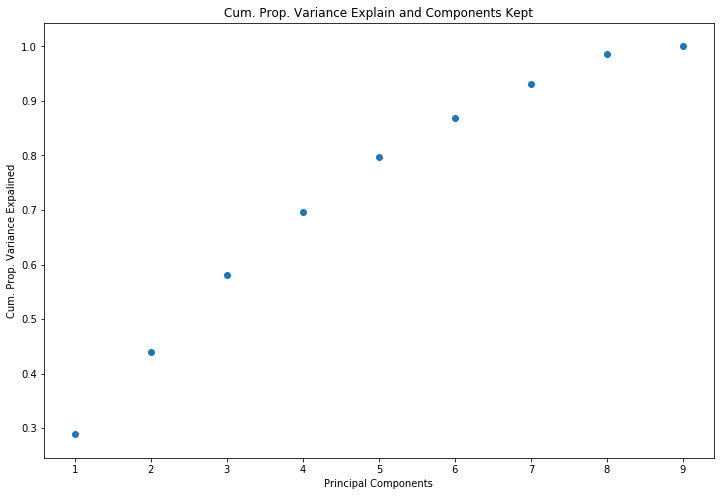

In [81]:
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.scatter(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

In [0]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:2]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

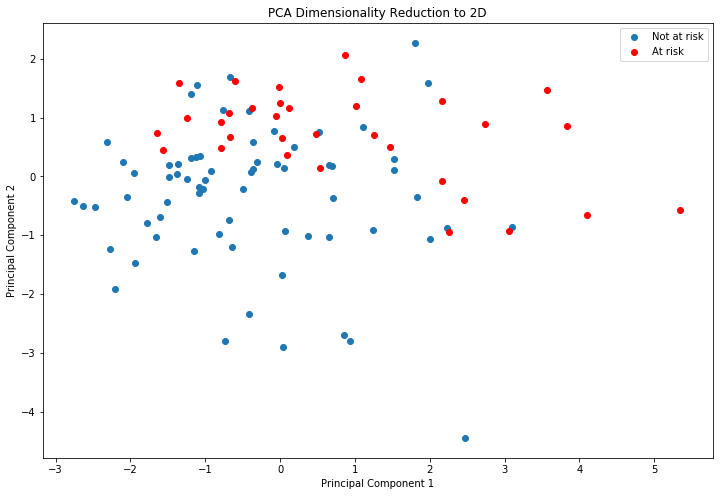

In [87]:
# Visualize data in 2D

# Plot projected the data onto 2D (test non claimers)
negative = plt.scatter(Proj_data_2D[:,0][y == 0], Proj_data_2D[:,1][y == 0])

# Plot projected the data onto 2D (claimers)
positive = plt.scatter(Proj_data_2D[:,0][y == 1], Proj_data_2D[:,1][y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["Not at risk", "At risk"])

# Show scatter plot
plt.show()
plt.rcParams['figure.figsize'] = (12,8)

In [0]:
# Step 4: Project data onto 3d 

# Keep the first three principal components 
# P_reduce is k x 3 matrix
P_reduce = np.array(eigvectors_sort[0:3]).transpose()

# Let's project data onto 3D space
# The projected data in 3D will be n x 3 matrix
Proj_data_3D = np.dot(X_std,P_reduce)

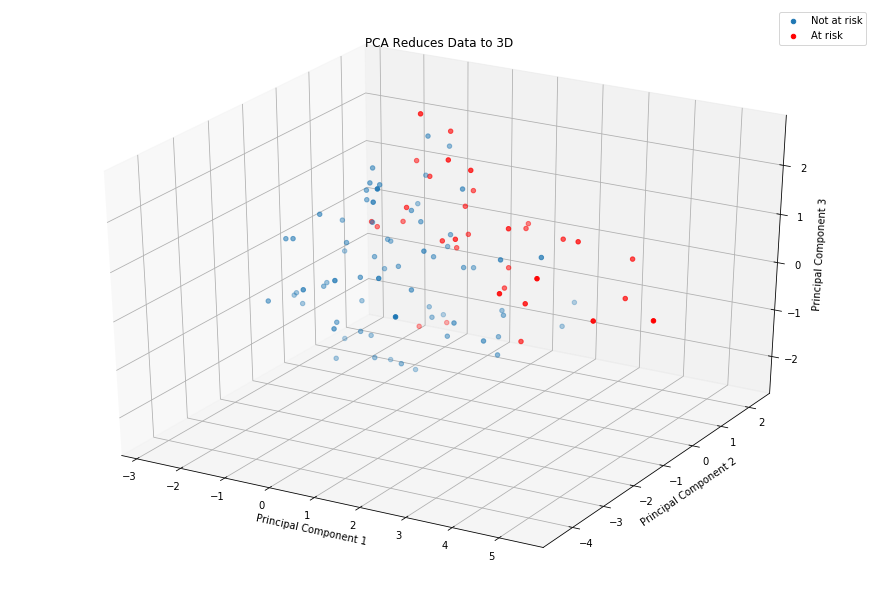

In [86]:
# Visualize data in 3D

# Define 3D figure
fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for diabetes)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for diabetes)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["Not at risk", "At risk"])

# Show 3D plot
plt.show()